In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
data = pd.read_csv('train_minimized.csv')
data.head()

,acoustic_data,time_to_failure
0,0,6.165400
1,-4,0.962397
2,3,4.721397
3,3,6.549698
4,12,0.286700


In [ ]:
data.shape

(10000, 2)

In [ ]:
X = data['acoustic_data']
y = data['time_to_failure']

In [ ]:
# Feature Engineering: Rolling Features

window_size = 10
data['rolling_mean'] = X.rolling(window=window_size).mean()
data['rolling_std'] = X.rolling(window=window_size).std()
data.fillna(0, inplace=True)

In [ ]:
# Outlier Handling: Clip values

lower_bound, upper_bound = X.quantile([0.01, 0.99])
X = X.clip(lower_bound, upper_bound)

In [ ]:
# Scaling the features using MinMaxScaler

feature_columns = ['acoustic_data', 'rolling_mean', 'rolling_std']
data[feature_columns] = MinMaxScaler().fit_transform(data[feature_columns])

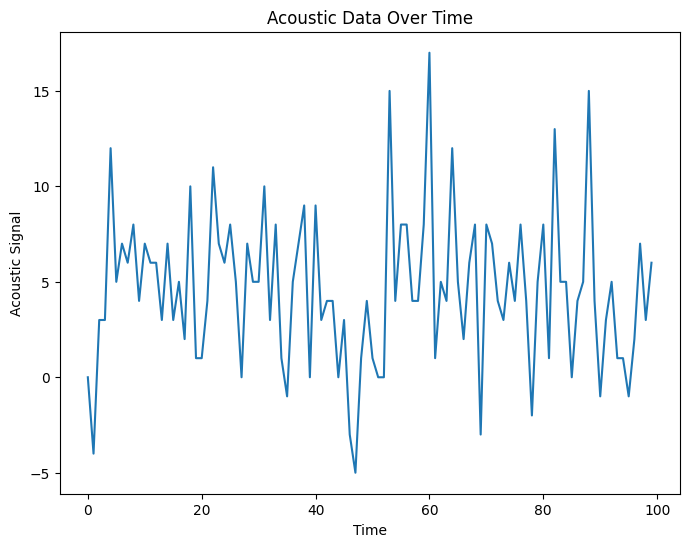

In [ ]:
# Plotting acoustic data for first 100 elements

plt.figure(figsize=(8, 6))
plt.plot(X.iloc[:100])
plt.title('Acoustic Data Over Time')
plt.xlabel('Time')
plt.ylabel('Acoustic Signal')
plt.show()

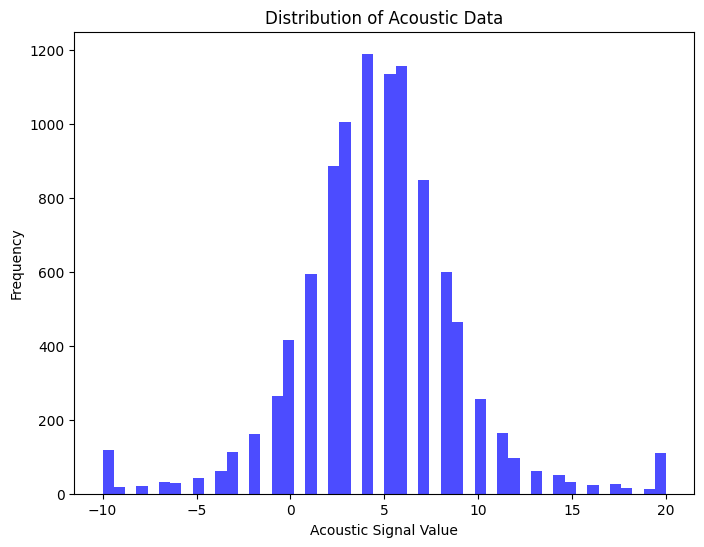

In [ ]:
# Plotting Distribution of Acoustic_data

plt.figure(figsize=(8, 6))
plt.hist(X, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Acoustic Data')
plt.xlabel('Acoustic Signal Value')
plt.ylabel('Frequency')
plt.show()

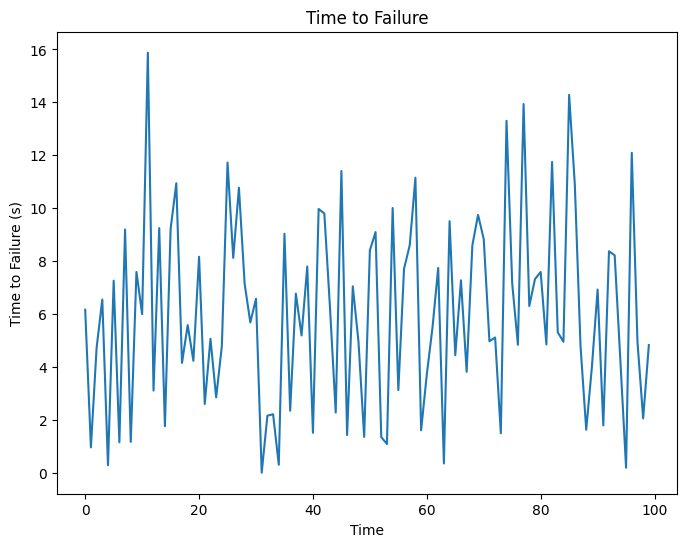

In [ ]:
# Plotting Time to Failure for first 100 elements

plt.figure(figsize=(8, 6))
plt.plot(y.iloc[:100])
plt.title('Time to Failure')
plt.xlabel('Time')
plt.ylabel('Time to Failure (s)')
plt.show()

In [ ]:
#re-shaping to 2D Array

#Running this once will suffice.
#Commented out after first use.
#Please un-comment if running for the first time.

X = X.values.reshape(-1, 1)

##Random Forest Regressor

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Calculate and print Mean Absolute Error (MAE)
rf_mse = mean_squared_error(y_test, predictions)
rf_mae = mean_absolute_error(y_test, predictions)
print(f"Random Forest Regressor - MAE: {rf_mae}, MSE: {rf_mse}")

Random Forest Regressor - MAE: 3.0594479527309484, MSE: 13.589668592610197


##Support Vector Regression using Linear Kernel

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVR models with Linear kernels
svr_linear = SVR(kernel='linear')

# Train the models
svr_linear.fit(X_train, y_train)

# Make predictions on the test set
predictions_linear = svr_linear.predict(X_test)

# Calculate and print Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae_linear = mean_absolute_error(y_test, predictions_linear)
mse_linear = mean_squared_error(y_test, predictions_linear)
print(f"SVR with Linear Kernel - MAE: {mae_linear}, MSE: {mse_linear}")

SVR with Linear Kernel - MAE: 3.0638463063497015, MSE: 13.846059852356023


##Support Vector Regression using Radial Basis Function (RBF) kernel

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVR models with RBF kernels
svr_rbf = SVR(kernel='rbf')

# Train the models
svr_rbf.fit(X_train, y_train)

# Make predictions on the test set
predictions_rbf = svr_rbf.predict(X_test)

# Calculate and print Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae_rbf = mean_absolute_error(y_test, predictions_rbf)
mse_rbf = mean_squared_error(y_test, predictions_rbf)
print(f"SVR with RBF Kernel - MAE: {mae_rbf}, MSE: {mse_rbf}")

SVR with RBF Kernel - MAE: 3.043088143559538, MSE: 13.674751573407903


##XGBoost (eXtreme Gradient Boosting)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost regressor model with specific parameters:
model = xgb.XGBRegressor(
    objective ='reg:squarederror',  # Set the regression objective to 'squared error', which is suitable for regression tasks.
    colsample_bytree = 0.3,  # This parameter specifies the fraction of features (columns) to be randomly sampled for each tree. 0.3 means 30% of features will be randomly chosen.
    learning_rate = 0.1,  # The learning rate, or "eta", value. A smaller learning rate requires more boosting rounds but can lead to better performance and prevent overfitting.
    max_depth = 5,  # The maximum depth of a tree. Deeper trees can model more complex patterns but can also lead to overfitting.
    alpha = 10,  # The L1 regularization term on weights (equivalent to Lasso regression). A higher value leads to more regularization.
    n_estimators = 10  # Number of boosting rounds. This is the number of trees to build.
)
# This setup of the model is well-suited for small to medium-sized datasets and is a good starting point.

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)

print(f"Using XG Boost Regressor - MAE: {mae_xgb}, MSE: {mse_xgb}")

Using XG Boost Regressor - MAE: 3.059653290637646, MSE: 13.571219532290547


#Fully Connected Neural Network (FNN) and Convolutional Neural Network (CNN)

In [ ]:
# Function to plot the loss and validation loss of a model

def plot_loss(history, title="Model Loss"):
    plt.figure(figsize=(8, 4))                                # Setting the figure size
    plt.plot(history.history['loss'], label='Train Loss')     # Plot training loss
    plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
    plt.title(title)                                          # Set the title of the plot
    plt.ylabel('Loss')                                        # Set the y-axis label
    plt.xlabel('Epoch')                                       # Set the x-axis label
    plt.legend(loc='upper right')                             # Set the legend location
    plt.show()                                                # Display the plot

Epoch 1/10
88/88 [==============================] - 1s 5ms/step - loss: 26.9780 - val_loss: 21.8573
Epoch 2/10
88/88 [==============================] - 0s 3ms/step - loss: 19.7607 - val_loss: 16.7882
Epoch 3/10
88/88 [==============================] - 0s 3ms/step - loss: 14.8214 - val_loss: 13.6722
Epoch 4/10
88/88 [==============================] - 0s 3ms/step - loss: 13.5601 - val_loss: 13.6560
Epoch 5/10
88/88 [==============================] - 0s 3ms/step - loss: 13.6287 - val_loss: 13.8909
Epoch 6/10
88/88 [==============================] - 0s 3ms/step - loss: 13.5268 - val_loss: 13.5703
Epoch 7/10
88/88 [==============================] - 0s 3ms/step - loss: 13.5800 - val_loss: 13.5682
Epoch 8/10
88/88 [==============================] - 0s 3ms/step - loss: 13.4980 - val_loss: 13.5847
Epoch 9/10
88/88 [==============================] - 0s 3ms/step - loss: 13.5260 - val_loss: 13.8471
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 13.7104

FNN Model MSE: 13.

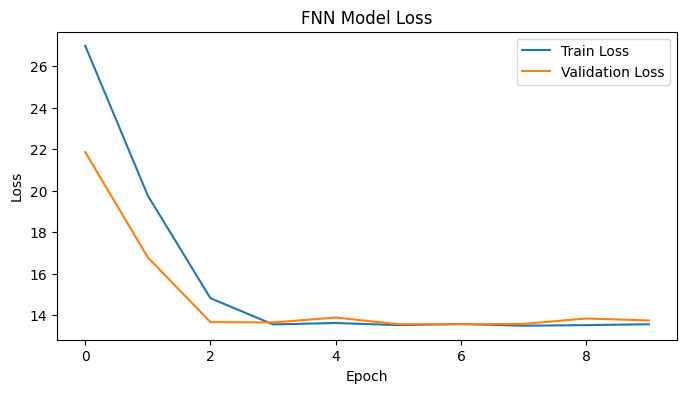

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing a Sequential model for Fully Connected Neural Network (FNN)
fnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),  # Input layer with 64 neurons
    Dense(64, activation='relu'),                    # Hidden layer with 64 neurons
    Dense(1)                                         # Output layer for regression
])

# Compile the FNN model with Adam optimizer and mean squared error loss function
fnn_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the FNN model on the training data
fnn_history = fnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

# Evaluate the FNN model on the test data and print Mean Absolute Error (MAE)
fnn_mse = fnn_model.evaluate(X_test, y_test)
print(f"\nFNN Model MSE: {fnn_mse}")

# Plot the training and validation loss for the FNN model
plot_loss(fnn_history, title="FNN Model Loss")

Epoch 1/10
88/88 [==============================] - 1s 5ms/step - loss: 27.8586 - val_loss: 21.9644
Epoch 2/10
88/88 [==============================] - 0s 3ms/step - loss: 19.1701 - val_loss: 16.0029
Epoch 3/10
88/88 [==============================] - 0s 3ms/step - loss: 14.2524 - val_loss: 13.6411
Epoch 4/10
88/88 [==============================] - 0s 3ms/step - loss: 13.5190 - val_loss: 13.5771
Epoch 5/10
88/88 [==============================] - 0s 4ms/step - loss: 13.5472 - val_loss: 13.5811
Epoch 6/10
88/88 [==============================] - 0s 3ms/step - loss: 13.5102 - val_loss: 13.5277
Epoch 7/10
88/88 [==============================] - 0s 3ms/step - loss: 13.5544 - val_loss: 13.5658
Epoch 8/10
88/88 [==============================] - 0s 3ms/step - loss: 13.4895 - val_loss: 13.5769
Epoch 9/10
88/88 [==============================] - 0s 3ms/step - loss: 13.5027 - val_loss: 13.6547
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 13.5721

CNN Model MSE: 13.

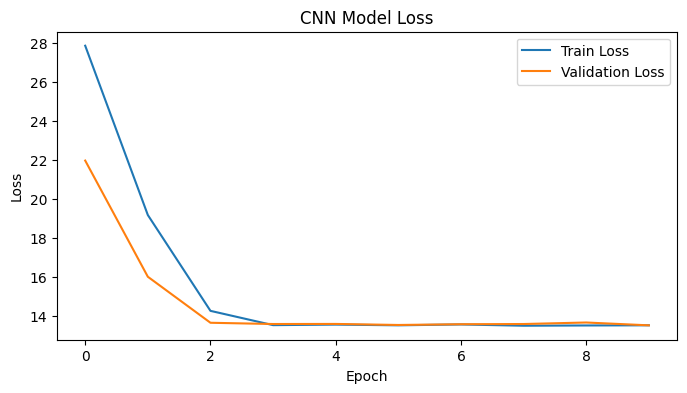

In [ ]:
# Reshaping training data for compatibility with CNN input requirements
X_train_cnn = X_train.reshape((X_train.shape[0], 1, 1))

# Reshaping testing data for compatibility with CNN input requirements
X_test_cnn = X_test.reshape((X_test.shape[0], 1, 1))

# Initializing a Sequential model for Convolutional Neural Network (CNN)
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, 1)),  # Convolutional layer
    Flatten(),                                                               # Flatten layer
    Dense(50, activation='relu'),                                            # Dense layer with 50 neurons
    Dense(1)                                                                 # Output layer for regression
])

# Compile the CNN model with Adam optimizer and mean squared error loss function
cnn_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the CNN model on the reshaped training data
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_split=0.3)

# Evaluate the CNN model on the reshaped test data and print Mean Absolute Error (MAE)
cnn_mse = cnn_model.evaluate(X_test_cnn, y_test)
print(f"\nCNN Model MSE: {cnn_mse}")

# Plot the training and validation loss for the CNN model
plot_loss(cnn_history, title="CNN Model Loss")

##Recurrent Neural Network (RNN) using Long Short-Term Memory (LSTM)

Epoch 1/10
20/20 [==============================] - 62s 3s/step - loss: 3.6647 - val_loss: 3.0366
Epoch 2/10
20/20 [==============================] - 55s 3s/step - loss: 3.1122 - val_loss: 3.0414
Epoch 3/10
20/20 [==============================] - 53s 3s/step - loss: 3.1000 - val_loss: 3.0366
Epoch 4/10
20/20 [==============================] - 55s 3s/step - loss: 3.0898 - val_loss: 3.0345
Epoch 5/10
20/20 [==============================] - 55s 3s/step - loss: 3.0921 - val_loss: 3.0697
Epoch 6/10
20/20 [==============================] - 60s 3s/step - loss: 3.0971 - val_loss: 3.0362
Epoch 7/10
20/20 [==============================] - 55s 3s/step - loss: 3.1017 - val_loss: 3.0344
Epoch 8/10
20/20 [==============================] - 60s 3s/step - loss: 3.1003 - val_loss: 3.0516
Epoch 9/10
20/20 [==============================] - 58s 3s/step - loss: 3.0979 - val_loss: 3.0996
Epoch 10/10
77/77 [==============================] - 23s 286ms/step
Epoch 1/10
39/39 [==============================] 

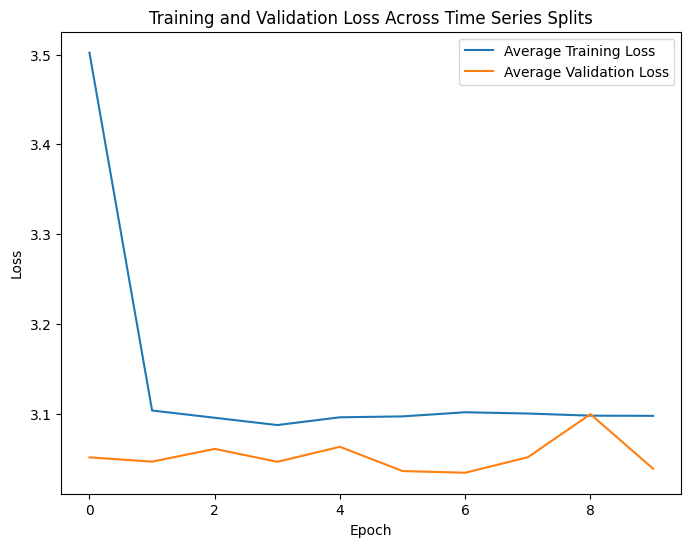

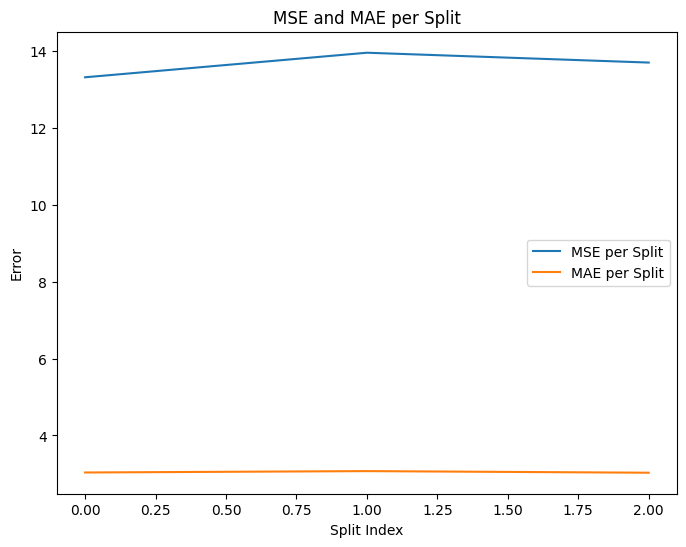

77/77 [==============================] - 21s 277ms/step


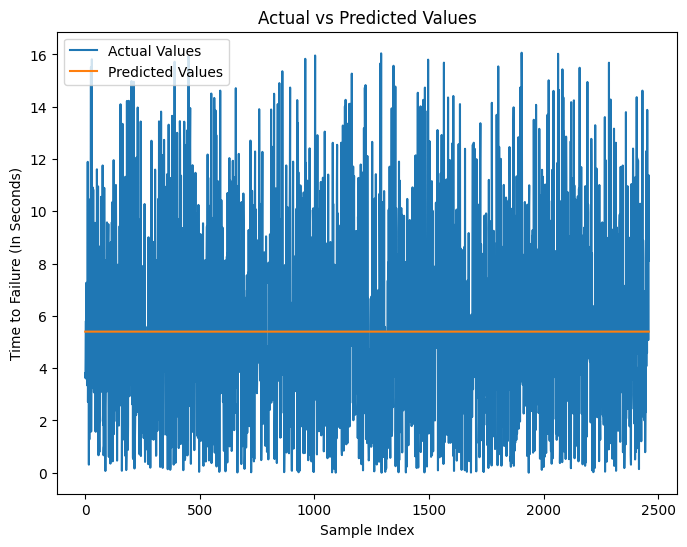

In [ ]:
# Function to create sequences for LSTM
def create_sequences(data, sequence_length, prediction_distance):
    X, y = [], []
    for i in range(len(data) - sequence_length - prediction_distance):
        X.append(data[feature_columns].iloc[i:i+sequence_length].values)
        y.append(data['time_to_failure'].iloc[i+sequence_length+prediction_distance])
    return np.array(X), np.array(y)

sequence_length = 150
prediction_distance = 10
X, y = create_sequences(data, sequence_length, prediction_distance)
X = X.reshape((X.shape[0], X.shape[1], len(feature_columns)))  # Reshaping for LSTM

# TimeSeriesSplit for train-test split
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)

# Array to store model performance metrics for each split
metrics = []

max_epochs = 10 # Define maximum epochs

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Building the LSTM model
    model = Sequential([
        LSTM(256, return_sequences=True, input_shape=(sequence_length, len(feature_columns))),
        Dropout(0.2),
        LSTM(128, return_sequences=True),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(100),
        LeakyReLU(alpha=0.02),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error')

    # Implement early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=max_epochs, batch_size=128, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

    # Calculate MSE and MAE for this split
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    metrics.append({
        'train_loss': np.pad(history.history['loss'], (0, max_epochs - len(history.history['loss'])), 'constant', constant_values=np.nan),
        'val_loss': np.pad(history.history['val_loss'], (0, max_epochs - len(history.history['val_loss'])), 'constant', constant_values=np.nan),
        'mse': mse,
        'mae': mae
    })

# Calculate the average losses, ignoring NaNs
average_train_loss = np.nanmean([m['train_loss'] for m in metrics], axis=0)
average_val_loss = np.nanmean([m['val_loss'] for m in metrics], axis=0)

# Plotting aggregated training and validation loss
plt.figure(figsize=(8, 6))
if len(average_train_loss) > 0:
    plt.plot(average_train_loss, label='Average Training Loss')
if len(average_val_loss) > 0:
    plt.plot(average_val_loss, label='Average Validation Loss')
plt.title('Training and Validation Loss Across Time Series Splits')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting MSE and MAE for each split
plt.figure(figsize=(8, 6))
plt.plot([m['mse'] for m in metrics], label='MSE per Split')
plt.plot([m['mae'] for m in metrics], label='MAE per Split')
plt.title('MSE and MAE per Split')
plt.xlabel('Split Index')
plt.ylabel('Error')
plt.legend()
plt.show()

# Plot Actual vs Predicted Values for the last test split
X_test_visualize, y_test_visualize = X[test_index], y[test_index]
predictions_visualize = model.predict(X_test_visualize).flatten()

plt.figure(figsize=(8, 6))
plt.plot(y_test_visualize, label='Actual Values')
plt.plot(predictions_visualize, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Time to Failure (In Seconds)')
plt.legend()
plt.show()